# <u>Phase 1 Project: Movies:</u>
#### Jesse Markowitz's Working Jupyter Notebook

## Question/Exploration ideas:

1. Popular actors correlate with high ratings? (Measure popularity by how many movies they've been cast in?)
2. Look for popular words in ratings/reviews to ID plot points/content?
3. Comparing popularity/ratings of series/sequels/franchies vs stand-alone films.
4. By studio, director, or writer

## Import the IMDB files

In [2]:
import pandas as pd

ratings_df = pd.read_csv('imdb.title.ratings.csv.gz')
crew_df = pd.read_csv('imdb.title.crew.csv.gz')
name_df = pd.read_csv('./unzippedData/imdb.name.basics.csv')
title_basics_df = pd.read_csv('./unzippedData/imdb.title.basics.csv')
title_akas_df = pd.read_csv('./unzippedData/imdb.title.akas.csv')
principals_df = pd.read_csv('./unzippedData/imdb.title.principals.csv')

In [3]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [5]:
name_df.head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


In [6]:
title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
title_basics_df.shape

(146144, 6)

In [9]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


## Join the dataframes into one overall dataframe

The `tconst` and `nmcost` are the primary keys for movie titles and crew names. We will not continue using `title_akas_df` because it contains only the movie titles given in other countries, but not much other useful information.

In [11]:
movies_info_df = title_basics_df.merge(ratings_df, how='left', on='tconst')
movies_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [12]:
movies_info_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

Based on the amount of `NaN` values, it seems like only about half of the movies listed in `titles_basics_df` have ratings available.

In [13]:
movies_info_df.shape

(146144, 8)

In [14]:
movies_names_df = movies_info_df.merge(principals_df, how='right', on='tconst')

In [15]:
complete_df = movies_names_df.merge(name_df, how='left', on='nconst')

In [16]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1028186 non-null  object 
 1   primary_title       1028186 non-null  object 
 2   original_title      1028186 non-null  object 
 3   start_year          1028186 non-null  int64  
 4   runtime_minutes     827933 non-null   float64
 5   genres              1006451 non-null  object 
 6   averagerating       629755 non-null   float64
 7   numvotes            629755 non-null   float64
 8   ordering            1028186 non-null  int64  
 9   nconst              1028186 non-null  object 
 10  category            1028186 non-null  object 
 11  job                 177684 non-null   object 
 12  characters          393360 non-null   object 
 13  primary_name        1027912 non-null  object 
 14  birth_year          234048 non-null   float64
 15  death_year     

In [17]:
complete_df.shape

(1028186, 18)

In [18]:
complete_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808


Going forward, we will use `movies_info_df` as we are not analyzing the cast or crew.

## Clean the data
**Remove columns and rows that won't be needed from `movies_info_df`**

In [19]:
movies_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [20]:
movies_info_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

The <a href="https://www.imdb.com/interfaces/">documentation from IMDB</a> says that `'primary_title'` is the most popular or commonly used title (`'original_title'` is different especially for foreign films) , so we drop `'original_title'`.

In [21]:
movies_info_df.drop('original_title', axis=1, inplace=True)

In [22]:
movies_info_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Let's look at the release dates given by `'start_year'`:

In [23]:
movies_info_df.start_year.value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

Some of the movies listed in this data are slated for release in the future. (One movie, titled "100 Years" has a release date of 2115!) We drop these movies as there is no available data for their gross box office revenue.

We also drop data from 2020 and 2021 as these data are heavily affected by the covid-19 pandemic. We instead build our model using only pre-pandemic data.

In [24]:
movies_info_df.drop(movies_info_df[movies_info_df['start_year'] > 2019].index, inplace=True)
movies_info_df.start_year.value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
Name: start_year, dtype: int64

In [25]:
movies_info_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,2017,116.0,NaN,NaN,NaN


In [26]:
movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145081 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           145081 non-null  object 
 1   primary_title    145081 non-null  object 
 2   start_year       145081 non-null  int64  
 3   runtime_minutes  114316 non-null  float64
 4   genres           139722 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


In [27]:
movies_info_df.isna().sum()

tconst                 0
primary_title          0
start_year             0
runtime_minutes    30765
genres              5359
averagerating      71225
numvotes           71225
dtype: int64

## Filter based on top movies
**Use the top ~500 movies that Lorela found based on ROI, budget, and revenue.**

In [28]:
with open('top_movie_list.txt') as f:
    top_movie_list = f.readlines()

top_movie_list = [movie.strip() for movie in top_movie_list]
top_movie_list

['Avatar',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'The Avengers',
 'Jurassic World',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Iron Man 3',
 'Furious 7',
 'Captain Marvel',
 'Jurassic World: Fallen Kingdom',
 'Beauty and the Beast',
 'Aquaman',
 'Frozen',
 'Zootopia',
 'Harry Potter and the Order of the Phoenix',
 'The Twilight Saga: Breaking Dawn, Part 2',
 'The Hunger Games: Catching Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows: Part II',
 'The Hunger Games: Mockingjay - Part 1',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Harry Potter and the Deathly Hallows: Part I',
 'The Da Vinci Code',
 'Venom',
 'Star Wars Ep. I: The Phantom Menace',
 'Star Wars Ep. III: Revenge of the Sith',
 'Deadpool 2',
 'Gravity',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Martian',
 'Harry Potter and the Chamber of Secrets',
 'Ice Age: Continental Drift',
 'Finding Nemo',
 'The Lord of the Rings: T

In [29]:
set(movies_info_df['primary_title'].values)

{'Ilfipetrov',
 'Wild at Heart: The Feral & Homeless Cat Crisis in Nova Scotia',
 'Behind the Curtain: Eclipsed',
 'A Genesis Found',
 'EGOnomics',
 'A Letter from London',
 'Crime & Punishment',
 'Malika Leopard Huntress',
 'FNSEA: Enquête sur empire agricole',
 'Medieval',
 'Baccha shoshur',
 "Don't Touch My Children",
 'Squad',
 'Carpet Racers',
 'Fabiana',
 'Waiting for Bardot',
 'San Francesco, un santo nel Medioevo',
 'Ataka sovetskikh zombi',
 'Artichoke',
 'Die Rebellie van Lafras Verwey',
 'Apothecary',
 'We Need to Talk About Kevin',
 'Memory Lane',
 'Women Will Come: Feminists Redefining Pornography',
 'My Alien Girlfriend',
 'She Is the Ocean',
 'The Summit',
 'Raul: O Início, o Fim e o Meio',
 'Becks letzter Sommer',
 'Return to Babylon',
 'The White Faced Man',
 'Tiger & Wolf',
 'Blood of the Amazon',
 'Coorporation and Community',
 'Spam',
 'After Auschwitz',
 'Taking Earth',
 'The Gun That Shot Twice',
 'Hillsville 1912: A Shooting in the Court',
 'Mike',
 'The Burnstor

In [30]:
matching_movies = [movie for movie in top_movie_list if movie in set(movies_info_df['primary_title'].values)]

In [31]:
matching_movies

['Avatar',
 'Avengers: Infinity War',
 'The Avengers',
 'Jurassic World',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Iron Man 3',
 'Furious 7',
 'Captain Marvel',
 'Jurassic World: Fallen Kingdom',
 'Beauty and the Beast',
 'Aquaman',
 'Frozen',
 'Zootopia',
 'The Hunger Games: Catching Fire',
 'The Hunger Games: Mockingjay - Part 1',
 'Venom',
 'Deadpool 2',
 'Gravity',
 'The Martian',
 'Ice Age: Continental Drift',
 'Jumanji: Welcome to the Jungle',
 'The Hunger Games',
 'The Hangover Part II',
 'The Lion King',
 'Despicable Me 2',
 'The Secret Life of Pets',
 'Sing',
 'Despicable Me 3',
 'Minions',
 'Despicable Me',
 'The Twilight Saga: Eclipse',
 'Hotel Transylvania 3: Summer Vacation',
 'Gone Girl',
 'The Lego Movie',
 'Deadpool',
 'American Sniper',
 'Bohemian Rhapsody',
 'Hitch',
 'Fifty Shades Darker',
 'Murder on the Orient Express',
 'Fifty Shades Freed',
 'Ted',
 '22 Jump Street',
 'Peter Rabbit',
 'Taken 3',
 "My Best Friend's Wedding",
 'Taken 2',
 'The Karate Kid',

In [32]:
top_movies_df = movies_info_df[movies_info_df['primary_title'].isin(top_movie_list)]
top_movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
60,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
266,tt0790636,Dallas Buyers Club,2013,117.0,"Biography,Drama",8.0,402462.0
356,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
476,tt0947798,Black Swan,2010,108.0,"Drama,Thriller",8.0,648854.0
497,tt0964517,The Fighter,2010,116.0,"Biography,Drama,Sport",7.8,316539.0
...,...,...,...,...,...,...,...
143730,tt9574324,Chicago,2019,NaN,"Comedy,Crime,Drama",NaN,NaN
143734,tt9574444,The Gift,2019,86.0,Romance,NaN,NaN
144696,tt9698912,Aladdin,2017,NaN,Fantasy,NaN,NaN
144711,tt9702034,Neighbors,2012,NaN,Drama,NaN,NaN


In [33]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 60 to 145156
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           302 non-null    object 
 1   primary_title    302 non-null    object 
 2   start_year       302 non-null    int64  
 3   runtime_minutes  273 non-null    float64
 4   genres           297 non-null    object 
 5   averagerating    248 non-null    float64
 6   numvotes         248 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 18.9+ KB


Since we're trying to find the distribution of movie genres, we drop all rows that have `NaN` values in `'genres'`.

In [34]:
top_movies_df = top_movies_df.dropna(subset=['genres'])
movies_info_df = movies_info_df.dropna(subset=['genres'])

In [35]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 60 to 145156
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           297 non-null    object 
 1   primary_title    297 non-null    object 
 2   start_year       297 non-null    int64  
 3   runtime_minutes  272 non-null    float64
 4   genres           297 non-null    object 
 5   averagerating    248 non-null    float64
 6   numvotes         248 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 18.6+ KB


## Visualizing top genres

We will examine the distribution of the top movie genres, then compare to the general population of movies.

In [36]:
import matplotlib.pyplot as plt

In [37]:
top_movies_df['genres'].value_counts()

Drama                       34
Documentary                 17
Horror,Mystery,Thriller     16
Comedy,Drama,Romance        11
Action,Adventure,Sci-Fi     10
                            ..
Comedy,Drama,Family          1
Romance                      1
Comedy,Drama,Mystery         1
Fantasy                      1
Biography,Drama,Thriller     1
Name: genres, Length: 110, dtype: int64

In [38]:
list(top_movies_df['genres'].values)[0].split(",")

['Action', 'Adventure', 'Sci-Fi']

In [39]:
top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))
top_movies_df

<ipython-input-39-fee0e7641a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies_df['genres'] = top_movies_df['genres'].map(lambda x: x.split(","))


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
60,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338.0
266,tt0790636,Dallas Buyers Club,2013,117.0,"[Biography, Drama]",8.0,402462.0
356,tt0848228,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0
476,tt0947798,Black Swan,2010,108.0,"[Drama, Thriller]",8.0,648854.0
497,tt0964517,The Fighter,2010,116.0,"[Biography, Drama, Sport]",7.8,316539.0
...,...,...,...,...,...,...,...
143730,tt9574324,Chicago,2019,NaN,"[Comedy, Crime, Drama]",NaN,NaN
143734,tt9574444,The Gift,2019,86.0,[Romance],NaN,NaN
144696,tt9698912,Aladdin,2017,NaN,[Fantasy],NaN,NaN
144711,tt9702034,Neighbors,2012,NaN,[Drama],NaN,NaN


In [40]:
movies_info_df['genres']

0            Action,Crime,Drama
1               Biography,Drama
2                         Drama
3                  Comedy,Drama
4          Comedy,Drama,Fantasy
                  ...          
146138    Adventure,History,War
146139                    Drama
146140              Documentary
146141                   Comedy
146143              Documentary
Name: genres, Length: 139722, dtype: object

In [41]:
movies_info_df['genres'] = movies_info_df['genres'].map(lambda x: x.split(","))
movies_info_df

<ipython-input-41-c543b2f59c3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_info_df['genres'] = movies_info_df['genres'].map(lambda x: x.split(","))


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0
...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,NaN,"[Adventure, History, War]",NaN,NaN
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,[Drama],NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],NaN,NaN
146141,tt9916706,Dankyavar Danka,2013,NaN,[Comedy],NaN,NaN


In [42]:
from collections import defaultdict

top_genre_counts = defaultdict(int)
for genres in top_movies_df['genres']:
    for genre in genres:
        top_genre_counts[genre] += 1

gen_genre_counts = defaultdict(int)
for genres in movies_info_df['genres']:
    for genre in genres:
        gen_genre_counts[genre] += 1
        
top_genre_counts = dict(top_genre_counts)
gen_genre_counts = dict(gen_genre_counts)

Normalize--convert counts to percentages

In [43]:
top_genre_counts

{'Action': 54,
 'Adventure': 40,
 'Sci-Fi': 30,
 'Biography': 22,
 'Drama': 149,
 'Thriller': 53,
 'Sport': 6,
 'Documentary': 29,
 'Horror': 46,
 'Comedy': 78,
 'Romance': 35,
 'Music': 14,
 'Family': 14,
 'Mystery': 38,
 'Fantasy': 16,
 'Animation': 20,
 'History': 4,
 'Western': 1,
 'Crime': 19,
 'Musical': 4,
 'War': 2}

In [44]:
gen_genre_counts

{'Action': 10156,
 'Crime': 6691,
 'Drama': 49545,
 'Biography': 8695,
 'Comedy': 25127,
 'Fantasy': 3461,
 'Horror': 10692,
 'Thriller': 11746,
 'Adventure': 6366,
 'Animation': 2734,
 'Documentary': 51556,
 'History': 6209,
 'Mystery': 4630,
 'Sci-Fi': 3307,
 'Romance': 9327,
 'Family': 6184,
 'War': 1399,
 'Music': 4306,
 'Sport': 2232,
 'Western': 458,
 'Musical': 1419,
 'Adult': 25,
 'News': 1550,
 'Talk-Show': 50,
 'Reality-TV': 98,
 'Game-Show': 4,
 'Short': 11}

In [45]:
top_sum = sum(top_genre_counts.values())

for key in list(top_genre_counts.keys()):
    top_genre_counts[key] = (top_genre_counts[key] / top_sum) * 100
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Sci-Fi': 4.451038575667656,
 'Biography': 3.2640949554896146,
 'Drama': 22.106824925816024,
 'Thriller': 7.863501483679524,
 'Sport': 0.8902077151335311,
 'Documentary': 4.302670623145401,
 'Horror': 6.824925816023739,
 'Comedy': 11.572700296735905,
 'Romance': 5.192878338278932,
 'Music': 2.0771513353115725,
 'Family': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Fantasy': 2.3738872403560833,
 'Animation': 2.967359050445104,
 'History': 0.5934718100890208,
 'Western': 0.1483679525222552,
 'Crime': 2.8189910979228485,
 'Musical': 0.5934718100890208,
 'War': 0.2967359050445104}

In [46]:
gen_sum = sum(gen_genre_counts.values())

for key in list(gen_genre_counts.keys()):
    gen_genre_counts[key] = (gen_genre_counts[key] / gen_sum ) * 100
gen_genre_counts

{'Action': 4.454815815561151,
 'Crime': 2.934932318030687,
 'Drama': 21.73236014001351,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Fantasy': 1.518128942266359,
 'Horror': 4.689926220951144,
 'Thriller': 5.152251533042662,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Documentary': 22.614462799042013,
 'History': 2.723508408706103,
 'Mystery': 2.0308977182008787,
 'Sci-Fi': 1.4505785645983384,
 'Romance': 4.091184237075508,
 'Family': 2.7125424383054506,
 'War': 0.6136557036205248,
 'Music': 1.8887787418084203,
 'Sport': 0.9790418373702725,
 'Western': 0.20089657773995737,
 'Musical': 0.6224284799410469,
 'Adult': 0.010965970400652695,
 'News': 0.679890164840467,
 'Talk-Show': 0.02193194080130539,
 'Reality-TV': 0.04298660397055856,
 'Game-Show': 0.0017545552641044311,
 'Short': 0.004825026976287186}

In [47]:
# top_genre_counts = dict(sorted(top_genre_counts.items(), key=lambda x: x[1], reverse=True))
# gen_genre_counts = dict(sorted(gen_genre_counts.items(), key=lambda x: x[1], reverse=True))

Decided not to sort after all for better visualization. Instead, we will remove any genres that account for less than 1% of the total.

In [48]:
for key in list(gen_genre_counts.keys()):
    if gen_genre_counts[key] < 1:
        del gen_genre_counts[key]
gen_genre_counts

{'Action': 4.454815815561151,
 'Crime': 2.934932318030687,
 'Drama': 21.73236014001351,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Fantasy': 1.518128942266359,
 'Horror': 4.689926220951144,
 'Thriller': 5.152251533042662,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Documentary': 22.614462799042013,
 'History': 2.723508408706103,
 'Mystery': 2.0308977182008787,
 'Sci-Fi': 1.4505785645983384,
 'Romance': 4.091184237075508,
 'Family': 2.7125424383054506,
 'Music': 1.8887787418084203}

In [49]:
for key in list(top_genre_counts.keys()):
    if top_genre_counts[key] < 1:
        del top_genre_counts[key]
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Sci-Fi': 4.451038575667656,
 'Biography': 3.2640949554896146,
 'Drama': 22.106824925816024,
 'Thriller': 7.863501483679524,
 'Documentary': 4.302670623145401,
 'Horror': 6.824925816023739,
 'Comedy': 11.572700296735905,
 'Romance': 5.192878338278932,
 'Music': 2.0771513353115725,
 'Family': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Fantasy': 2.3738872403560833,
 'Animation': 2.967359050445104,
 'Crime': 2.8189910979228485}

In [50]:
top_genre_counts = dict(sorted(top_genre_counts.items(), key=lambda x: x[0].lower()))
top_genre_counts

{'Action': 8.011869436201781,
 'Adventure': 5.934718100890208,
 'Animation': 2.967359050445104,
 'Biography': 3.2640949554896146,
 'Comedy': 11.572700296735905,
 'Crime': 2.8189910979228485,
 'Documentary': 4.302670623145401,
 'Drama': 22.106824925816024,
 'Family': 2.0771513353115725,
 'Fantasy': 2.3738872403560833,
 'Horror': 6.824925816023739,
 'Music': 2.0771513353115725,
 'Mystery': 5.637982195845697,
 'Romance': 5.192878338278932,
 'Sci-Fi': 4.451038575667656,
 'Thriller': 7.863501483679524}

In [51]:
gen_genre_counts = dict(sorted(gen_genre_counts.items(), key=lambda x: x[0].lower()))
gen_genre_counts

{'Action': 4.454815815561151,
 'Adventure': 2.792374702822202,
 'Animation': 1.1992385230153786,
 'Biography': 3.813964505347007,
 'Comedy': 11.02167753028801,
 'Crime': 2.934932318030687,
 'Documentary': 22.614462799042013,
 'Drama': 21.73236014001351,
 'Family': 2.7125424383054506,
 'Fantasy': 1.518128942266359,
 'History': 2.723508408706103,
 'Horror': 4.689926220951144,
 'Music': 1.8887787418084203,
 'Mystery': 2.0308977182008787,
 'Romance': 4.091184237075508,
 'Sci-Fi': 1.4505785645983384,
 'Thriller': 5.152251533042662}

<ipython-input-52-375138d0a457>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_top.set_xticklabels(labels=list(top_genre_counts_keys), rotation=70)
<ipython-input-52-375138d0a457>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_gen.set_xticklabels(labels=list(gen_genre_counts_keys), rotation=70);


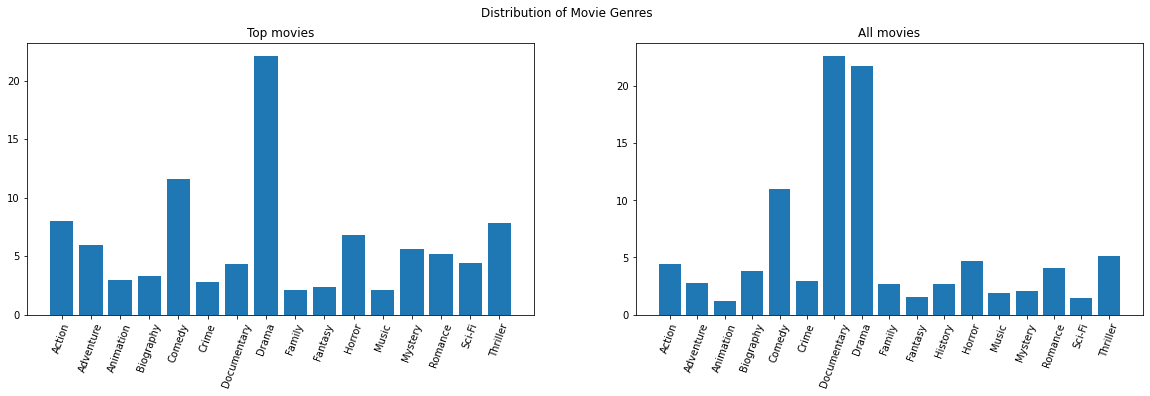

In [52]:
fig, (ax_top, ax_gen) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Distribution of Movie Genres')

top_genre_counts_keys = list(top_genre_counts.keys())
top_genre_counts_values = list(top_genre_counts.values())
gen_genre_counts_keys = list(gen_genre_counts.keys())
gen_genre_counts_values = list(gen_genre_counts.values())

ax_top.bar(x=top_genre_counts_keys, height=top_genre_counts_values)
ax_top.set_title('Top movies')
ax_top.set_xticklabels(labels=list(top_genre_counts_keys), rotation=70)

ax_gen.bar(x=gen_genre_counts_keys, height=gen_genre_counts_values)
ax_gen.set_title('All movies');
ax_gen.set_xticklabels(labels=list(gen_genre_counts_keys), rotation=70);


## Make it pretty!
**Grouped barplots with Seaborn**

It seems like it's going to be easier if all our data is in a Pandas DataFrame first.

In [1]:
comparing_genres_df = pd.from_dict(top_genre_counts)

NameError: name 'pd' is not defined

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")



## Scraping MPAA ratings from IMDB
***Need to use concurrent.futures so it doesn't take 40 hours***

In [1]:
# from bs4 import BeautifulSoup
# import requests

In [2]:
# html_page = requests.get('https://www.imdb.com/title/tt0069049/') # Make a get request to retrieve the page
# soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing

`<span class="TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex">G</span>`

In [3]:
# # find a list of all span elements
# spans = soup.find_all('span', {'class' : 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'})

# # create a list of lines corresponding to element texts
# ratings = [span.get_text() for span in spans][1]
# ratings

'R'

In [28]:
# # Define function for scraping rating from given IMDB movie page
# def retrieve_rating(soup):
#     spans = soup.find_all('span', {'class' : 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'})
#     return [span.get_text() for span in spans][1]

In [ ]:
# # Start lists
# tconst_list = list(title_basics_df.tconst)[:10]
# # partial_tconst = tconst_list[:5]
# mpaa_ratings = {}

# # Scrape each page
# for tconst in tconst_list:
#     try:
#         url = "https://www.imdb.com/title/{}/".format(tconst)
#         html_page = requests.get(url)
#         soup = BeautifulSoup(html_page.content, 'html.parser')
#         rating = retrieve_rating(soup)
#         if rating:
#             mpaa_ratings[tconst] = rating
#     except:
#         continue

# mpaa_ratings